In [1]:
import ROOT
from array import array

Welcome to JupyROOT 6.16/00


In [2]:
def DivideByBinWidth(histogram):
    for n in range(1, histogram.GetNbinsX() + 1):
        new_value = histogram.GetBinContent(n) / histogram.GetBinWidth(n)
        new_bin_error = histogram.GetBinError(n) / histogram.GetBinWidth(n)
        histogram.SetBinContent(n, new_value)
        histogram.SetBinError(n, new_bin_error)

In [4]:
ROOT.gROOT.ProcessLine('ROOT::EnableImplicitMT();')
df = ROOT.RDataFrame("taus", "/Volumes/Y2/tau-ml/tuples-v2-training-v2-t1-root/training/part*.root")
df = df.Define('pt', 'tau_pt *(1000. - 20.) + 20.').Define('eta', 'tau_eta * 2.3')

In [5]:
pt_bins = array('d', [20, 25, 30, 35, 40, 45, 50, 55, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200,
                    225, 250, 275, 300, 350, 400, 450, 500, 600, 700, 800, 900, 1000])
eta_bins = array('d', [-2.3, -1.725, -1.15, -0.575, 0., 0.575, 1.15, 1.725, 2.3])
obj_name = [ 'e', 'mu', 'tau', 'jet' ]
obj_desc = { 'e': ROOT.kRed, 'mu': ROOT.kGreen, 'tau': ROOT.kBlue, 'jet': ROOT.kOrange }

In [6]:
hists = {}
for obj in obj_name:
    hists[obj] = {}
    hists[obj]['pt'] = df.Filter('gen_{} == 1'.format(obj)) \
                         .Histo1D(('', '', len(pt_bins)-1, pt_bins), "pt")
    hists[obj]['pt_weighted'] = df.Filter('gen_{} == 1'.format(obj)) \
                                  .Histo1D(('', '', len(pt_bins)-1, pt_bins), "pt", "trainingWeight")
    hists[obj]['eta'] = df.Filter('gen_{} == 1'.format(obj)) \
                          .Histo1D(('', '', len(eta_bins)-1, eta_bins), "eta")
    hists[obj]['eta_weighted'] = df.Filter('gen_{} == 1'.format(obj)) \
                                   .Histo1D(('', '', len(eta_bins)-1, eta_bins), "eta", "trainingWeight")

In [7]:
for obj in obj_name:
    for key, hist in hists[obj].items():
        DivideByBinWidth(hist.GetPtr())

In [28]:
def Draw(name, x_title, y_title, log_x, ymin, ymax):
    hist = hists[obj_name[0]][name]
    ROOT.gStyle.SetOptStat(0)
    c = ROOT.TCanvas('', '', 600, 300)
    c.SetLogx(log_x)
    c.SetLogy()
    c.SetTopMargin(0.01)
    c.SetRightMargin(0.04)
    c.SetBottomMargin(0.21)
    c.SetLeftMargin(0.13)
    hist.Draw()
    hist.SetLineColor(obj_desc[obj_name[0]])
    hist.SetLineWidth(2)

    hist.GetXaxis().SetTitle(x_title)
    hist.GetXaxis().SetTitleSize(0.1)
    hist.GetYaxis().SetTitleSize(0.1)
    hist.GetXaxis().SetNoExponent(True)
    hist.GetXaxis().SetMoreLogLabels(True)
    
    hist.GetXaxis().SetTitleOffset(0.85)
    hist.GetYaxis().SetTitleOffset(0.6)
    
    hist.GetXaxis().SetLabelSize(0.07)
    hist.GetYaxis().SetLabelSize(0.07)
    hist.GetYaxis().SetTitle(y_title)
    
    hist.GetYaxis().SetRangeUser(ymin, ymax)
    for obj in obj_name[1:]:    
        hists[obj][name].Draw('SAME')
        hists[obj][name].SetLineColor(obj_desc[obj])
        hists[obj][name].SetLineWidth(2)

    c.Draw()
    c.Print(name + ".pdf")
    return c

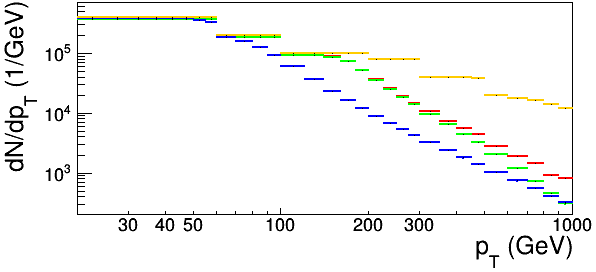

In [29]:
Draw('pt', 'p_{T} (GeV)', 'dN/dp_{T} (1/GeV)', True, 2e2, 7e5)

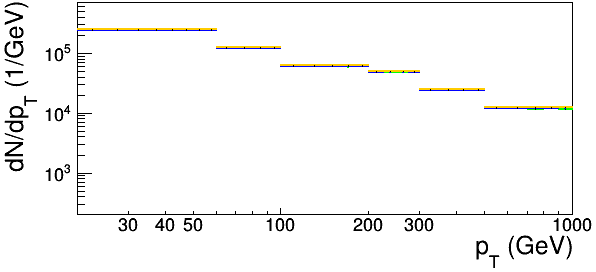

In [30]:
Draw('pt_weighted', 'p_{T} (GeV)', 'dN/dp_{T} (1/GeV)', True, 2e2, 7e5)

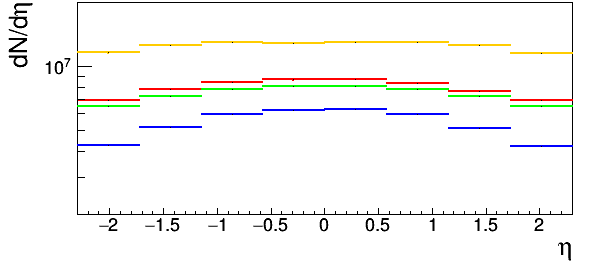

In [31]:
Draw('eta', '#eta', 'dN/d#eta', False, 2e6, 2e7)

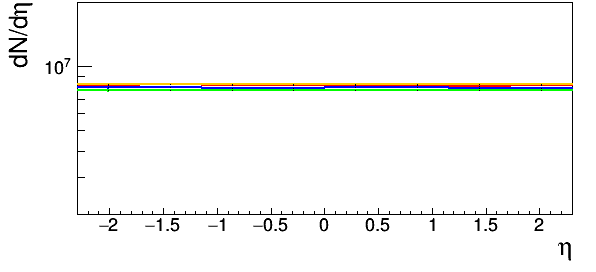

In [32]:
Draw('eta_weighted', '#eta', 'dN/d#eta', False, 2e6, 2e7)

In [26]:
hists['e']['eta'].GetBinContent(4)

8649003.478260871

In [ ]:
    pt = obj_pt[obj_name[0]]
    ROOT.gStyle.SetOptStat(0)
    c = ROOT.TCanvas()
    c.SetLogx()
    c.SetLogy()
    c.SetBottomMargin(0.2)
    c.SetLeftMargin(0.2)
    pt.Draw()
    pt.SetLineColor(obj_desc[obj_name[0]])
    pt.SetLineWidth(2)

    pt.GetXaxis().SetTitle('p_{T} (GeV)')
    pt.GetXaxis().SetTitleSize(0.05)
    pt.GetXaxis().SetNoExponent(True)
    pt.GetXaxis().SetMoreLogLabels(True)
    pt.GetXaxis().SetTitleOffset(1)
    pt.GetXaxis().SetLabelSize(0.04)
    pt.GetYaxis().SetLabelSize(0.04)
    pt.GetYaxis().SetTitle('dN/dp_{T} (1/GeV)')
    pt.GetYaxis().SetTitleSize(0.05)
    pt.GetYaxis().SetRangeUser(2e2, 7e5)
    for obj in obj_name[1:]:    
        obj_pt[obj].Draw('SAME')
        obj_pt[obj].SetLineColor(obj_desc[obj])
        obj_pt[obj].SetLineWidth(2)

    c.Draw()
    c.Print("unweighed_pt.pdf")

In [21]:
df.Max("trainingWeight").GetValue()

639.2525634765625

In [22]:
df.Min("trainingWeight").GetValue()

0.6366955637931824

In [23]:
639.2525634765625 / 0.6366955637931824

1004.0160475881856